La tecnología de secuenciación Sanger genera cromatrogramas a partir de los cuales es posible asignar la secuencia de nucleotidos que se haya procesado.

![Sanger](https://seqcore.brcf.med.umich.edu/sites/default/files/images/some_noise.gif)

Estos cromatrogramas suelen venir en archivos de formato .abi, y de ellos puede extraerse tanto la secuencia de nucleotidos como la calidad asociada a estos.

Biopython cuenta con la función X, la cual puede leer estos archivos para su posterior manipulación.

In [262]:
from Bio import SeqIO

# Ejercicio

Leer secuencias forward y reverse, y trimearlas según el phred quality

## Mejores respuestas
## 1. Veronica Velez

In [286]:
# Función general para trimear secuencias
# Parámetros: archivo de secuencia (con todos sus datos), valor del rango para evaluar con promedio, score para comparar quality.

def trimrec(lrec, n, score):
    phr = lrec.letter_annotations["phred_quality"]
    mitad=int(len(phr)/2)
    der= mitad 
    izq= mitad 
    izqend=False
    derend=False
    while izq >=0 and der < len(phr)-1:
        promizq= sum(phr[izq-n:izq])/float(n)
        promder= sum(phr[der:der+n])/float(n)
        if promizq >=score: 
            izq = izq - 1
        else:
            izqend=True
        if promder >=score: 
            der = der + 1
        else:
            derend=True
        if izqend and derend: 
            break
#---------------------
    trimedSeq = []
    idx = izq
    while idx <= der:
        trimedSeq.append(lrec.seq[idx])
        idx = idx + 1
#---------------------
                
    return trimedSeq , phr[izq:der]

# Esta función me devuelve: La secuencia trimeada y los valores Phred de cada nucleótido de la secuencia trimeada.

In [290]:
# Función para convertir de lista a String

def listToString(alist):
    s=""
    for c in alist:
        s = s + c
    return s

In [309]:
# Función que agrupa todo lo necesario para aplicar la función de trimear a las secuencias del ejercicio (S6_27F y S6_907R).

def main():
    from Bio import SeqIO
    record = SeqIO.read("raw_data/Sanger/S6_27F.ab1","abi")
    record2 = SeqIO.read("raw_data/Sanger/S6_907R.ab1","abi")

    # Para la secuencia S6_27F
    seqtrim,phredtrim =trimrec(record,6,30)  

    # Para la secuencia S6_907R  
    rec2reverse = [c for c in record2.seq]
    rec2reverse.reverse()
    seqtrim2,phredtrim2 =trimrec(record2,6,30)
    
    print(listToString(seqtrim))
    print(phredtrim)
    print()
    print(listToString(seqtrim2))
    print(phredtrim2)


In [310]:
# Llamado a la función principal: 

main()

AACATATCTGAGAGTAACTGTTCAGGTATTGACGGTATTTAACCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTTTTAAGTCTGATGTGAAAGCCTTCGGCTCAACCGAAGAAGTGCATCGGAAACTGGGAAACTTGAGTGCAGAAGAGGACAGTGGAACTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTGTCTGGTCTGTAACTGACGCTGAGGCTCGAAAGTATGGGTAGCAAACAGGATTAGATACCCTGGTAGTCCATACCGTAAACGATGAATGCTAAGTGT
[62, 56, 62, 62, 62, 62, 62, 62, 62, 62, 62, 51, 56, 38, 51, 39, 50, 51, 51, 62, 62, 62, 62, 62, 62, 62, 62, 62, 54, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 56, 62, 62, 62, 62, 56, 62, 62, 62, 62, 62, 62, 56, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 56, 62, 62, 62, 62, 42, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 47, 62, 62, 28, 28, 62, 62, 49, 62, 62, 62, 62, 62, 62, 58, 58, 58, 58, 58, 58, 58, 58, 54, 45, 58, 58, 54, 58, 58, 58, 58, 58, 58, 58, 54, 52, 58, 58, 43, 44, 58, 58, 58, 58, 58, 58, 54, 38, 58, 58, 58, 49, 54, 58, 58, 58, 58, 58, 54, 58, 52, 58, 58, 58, 58, 58, 31, 49,

La longitud de la secuencia después de recortarla es:

In [282]:
len(phredtrim)

382

In [283]:
len(phredtrim2)

569

Veamos ahora como se ven los cambios en la calidad(Phred score) de las secuencias:

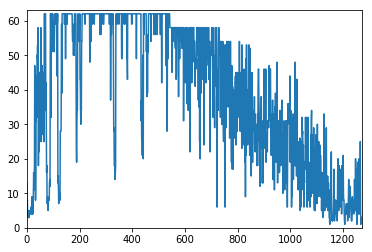

In [284]:
plt.plot(record.letter_annotations['phred_quality'])
plt.axis([0,len(record.seq),0,max(record.letter_annotations['phred_quality'])+1])
plt.show()

[0, 382, 0, 63]

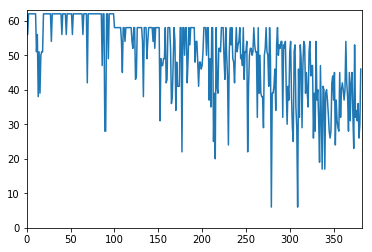

In [285]:
plt.plot(phredtrim)
plt.axis([0,len(phredtrim),0,max(phredtrim)+1])

## 2. Isabel Adarve

In [ ]:
#CON ESTA FUNCIÓN SE ESPERA RECORRER POR VENTANAS DEL RANGO QUE SE DESEE, LA SECUENCIA DESDE LA MITAD A PARTIR DE LOS VALORES PHRED (EL SCORE SE LO DA EL PROGRAMADOR SEGÚN SUS PREFERENCIAS)

def trimeado (prec, n, score):
    ph = prec.letter_annotations['phred_quality']
    half = int(len(ph)/2)
    rig = half
    lef = half
    lefend = False
    rigend = False

    while lef >= 0 and rig < len(ph)-1:
        promedlef = sum(ph [lef-n:lef])/float(n)
        promedrig = sum(ph [rig:rig+n])/float(n)
        if promedlef >= score:
            lef = lef - 1
        else:
            lefend = True
        if promedrig >= score:
            rig = rig + 1
        else:
            rigend = True
        if lefend and rigend:
            break

In [ ]:
#SE ESPERA OBTENER LA SECUENCIA TRIMEADA, NO CON LOS VALORES DE PHRED SINO CON LOS NUCLEÓTIDOS

secTrime = []
inx = lef
while inx <= rig:
    secTrime.append(prec.seq [inx])
    inx = inx + 1
#LO QUE VA A DEVOLVERSE: UNA SECUENCIA DE NUCLEÓTIDOS TRIMEADA Y LOS VALORES PHRED DE LOS NUCLÓTIDOS DE LA SECUENCIA TRIMEADA

return secTrime , ph [lef:rig]

In [ ]:
#¿CÓMO CONVERTIR DE LISTA A CADENA?

def listaAcadena (lalista):
    s = ''
    for c in lalista:
        s = s + c
    return s

In [ ]:
#COMPROBEMOS LAS FUNCIONES CON SECUENCIAS REALES

def principal():
	from Bio import SeqIO
	record = SeqIO.read(“/20181/SeqAnalyse/raw_data/Sanger/S12_27F.ab1”,”abi”)
	record2 = SeqIO.read(“/20181/SeqAnalyse/raw_data/Sanger/S12_907R.ab1”,”abi”)

	sequentrim,phtrim = trimeado(record,10,30)

	phredlist2.reverse()
	re2rever = [c for c in record2.seq]
	re2rever.reverse()
	sequentrim2,phtrim2 = trimeado(record2,10,30)

	print (listaAcadena(sequentrim))
	print (phtrim)
	print()
	print(listaAcadena(sequentrim2))
	print (phtrim2)


principal()

### 3. Giany Angulo

In [ ]:
def promedio (rango):
    suma=0
    i=0
    while i < len(rango):
        suma = suma + rango[i]
        i = i + 1
    return suma/len(rango)

promedio(listaprueba)

In [ ]:
def guardar (lista):
    guardado = [ ]
    num= promedio(lista)
    if num > 5:
        guardado.append(lista)
    return guardado
            
guardar(listaprueba)

In [ ]:
numero = len(phredlist)/2

def parte_entera(x):
    return int(x)

parte_entera(numero)

In [ ]:
def trimq_iz(p_l):
    listareal= " "
    score= 30
    phred= phredlist
    mitad= len(p_l)/2
    num = parte_entera(mitad)
    i=num
    j= num + 6
    while j < len(p_l):
        if promedio(phred[i:j]) < 30:
            listareal = j
            break 
        i = i + 1
        j = j + 1
    return listareal

trimq_iz(record1)

In [ ]:
def trimq_de (p_l):
    listareald= ""
    score=30
    phred= phredlist
    mitad= len(p_l)/2-1
    num = parte_entera(mitad)
    j = num
    i = num - 6
    while i >= 0:
        if promedio(phred[i:j]) < 30:
            listareald = i
            break
        i = i - 1
        j = j - 1
    return listareald

trimq_de(record1)

In [ ]:
def trimq(lista):
    return  lista[trimq_de(lista):trimq_iz(lista)]

trimq(record1)
record_trimmed = trimq(record1)
len(record_trimmed)

In [ ]:
plt.plot(record1.letter_annotations['phred_quality'])
plt.axis([0,len(record1.seq),0,max(record1.letter_annotations['phred_quality'])+1])
plt.show()

In [ ]:
plt.plot(record_trimmed.letter_annotations['phred_quality'])
plt.axis([0,len(record_trimmed.seq),0,max(record_trimmed.letter_annotations['phred_quality'])+1])
plt.show()